<h1>Algoritmo de Agrupamento eFMC</h1>
<h2>Alunos:</h2>
<h2>Vitor Martins Soares</h2>
<h2>Lucas Martins Soares</h2>
<h2>Jorge Vitor Gonçalves de Souza</h2>
O algoritmo eFMC é um algoritmo de agrupamento evolutivo utilizando fuzzy para calculo de pertêncimento, a proposta do algoritmo é ter um custo computacional baixo.

In [328]:
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

Aqui se tem a função que efetua o calculo do pertêncimento de uma amostra a todos os clusters já existentes e retorna o com maior grau de pertêncimento.

In [329]:
def distancia(classi, amostra):
    maior = float('-inf')
    classe = 0
    tam = []
    somatorio = 0
    for y in range(len(classi)):
        dista=0
        for z in range(len(amostra)):
            dista+=(amostra[z]-classi[y][z])**2
        dista = dista**0.5
        somatorio+=dista
        tam.append(dista)
    for y in range(len(classi)):
        dista = math.pow(tam[y],-1/2)/math.pow(somatorio,-1/2)
        if(dista>maior):
            maior = dista
            classe = y
    return classe

É feito a leitura da base de dados Routanting Gaussian e randomizando estes dados para efetuar a classificação.

In [330]:
data = open("gaus.csv")    
X = []
y = []
x1 = []
x2 = []
for x in data:
    x = x.replace('\n','')
    x = (x.split(','))
    x1.append(float(x[0]))
    x2.append(float(x[1]))
    X.append([float(x[0]),float(x[1])])
    y.append(float(x[2]))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)
X = X_train
y = y_train

Aqui é onde o eFMC acontece, é inicializado o primeiro cluster, que de acordo com o artigo tem que começar na mesma posição da primeira amostra, e deveria inicializar outro cluster com valores aleatórios, não percebi uma necessidade de fazer isso, então é começado a classificação com apenas 1 cluster inicial, após isto é efetuado o calculo do pertêncimento fuzzy e verificado a classificação de qual cluster a amostra pertênce, se a classificação foi feita incorretamente, verifica se o a classificação dela existe ou já foi iniciada, se não, é criada na posição desta um novo cluster, se já foi, apenas contabiliza o erro, após isto é atualizado a posição do centro de acordo com a media das posições de todas as amostras (de acordo com a sua classificação real, não com a prevista).

In [331]:
pertencimento = []
previsto = []
centros = [X[0]]
nomeCentro = [y[0]]
centrolAtual = 0
pertencimento.append(0)
previsto.append(0)
cont=0
for x in range(1,int(len(X))):
    classe = distancia(centros,X[x])
    previsto.append(classe)
    if(classe!=y[x]):
        cont+=1
    try:
        pertencimento.append(nomeCentro.index(y[x]))
        centrolAtual = nomeCentro.index(y[x])
    except:
        centros.append(X[x])
        nomeCentro.append(y[x])
        pertencimento.append(max(pertencimento)+1)
        centrolAtual = max(pertencimento)
    for k in range(len(centros[centrolAtual])):
        centros[centrolAtual][k] = ((centros[centrolAtual][k]*(pertencimento.count(centrolAtual)-1))+X[x][k])/pertencimento.count(centrolAtual)

Aqui é mostrado a quantidade de vezes que o algoritmo errou nesta base de dados, lembrando que como é randomizado as amostras, pode ser que tenha uma quantidade de erro maior ou menor de acordo com a randomização, porém não variou muito mias que 28, que é o erro mostrado abaixo

In [334]:
print(cont)

28


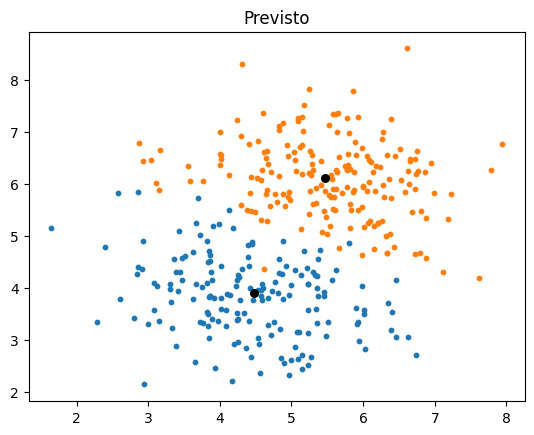

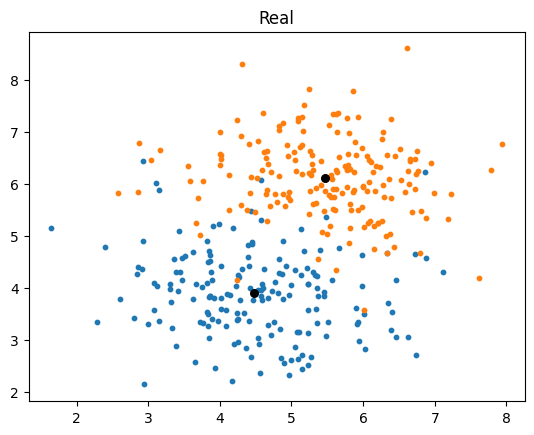

In [333]:
pontos = [[[],[]],[[],[]],[[],[]]]
for x in range(len(previsto)):
    if nomeCentro[previsto[x]] == 0:
        pontos[0][0].append(X[x][0])
        pontos[0][1].append(X[x][1])
    elif nomeCentro[previsto[x]] == 1:
        pontos[1][0].append(X[x][0])
        pontos[1][1].append(X[x][1])
    elif nomeCentro[previsto[x]] == 2:
        pontos[2][0].append(X[x][0])
        pontos[2][1].append(X[x][1])
plt.scatter(pontos[0][0],pontos[0][1],s=10)
plt.scatter(pontos[1][0],pontos[1][1],s=10)
plt.scatter(pontos[2][0],pontos[2][1],s=10)  
for x in centros:
    plt.scatter(x[0],x[1], color = 'black', marker = 'o', s = 30)    
plt.title("Previsto")
plt.show()

pontos = [[[],[]],[[],[]],[[],[]]]
for x in range(len(pertencimento)):
    if nomeCentro[pertencimento[x]] == 0:
        pontos[0][0].append(X[x][0])
        pontos[0][1].append(X[x][1])
    elif nomeCentro[pertencimento[x]] == 1:
        pontos[1][0].append(X[x][0])
        pontos[1][1].append(X[x][1])
    elif nomeCentro[pertencimento[x]] == 2:
        pontos[2][0].append(X[x][0])
        pontos[2][1].append(X[x][1])
plt.scatter(pontos[0][0],pontos[0][1],s=10)
plt.scatter(pontos[1][0],pontos[1][1],s=10)
plt.scatter(pontos[2][0],pontos[2][1],s=10)
for x in centros:
    plt.scatter(x[0],x[1], color = 'black', marker = 'o', s = 30)    
plt.title("Real")
plt.show()

Acima está a base de dados com os valores previstos e com os valores reais, é possível ver que os valores que provavelmente gerou erros foi os valores que estão muito distante do seu agrupamento.